In [5]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=21)

def parses(input):
    return [['.#S'.index(c) for c in line]
        for line in input.strip().split('\n')]

# import re
# def parses(input):
#     return [int(re.findall('\d', line)) for line in nput.strip().split('\n')]

data = parses(puzzle.input_data)

In [6]:
sample = parses("""...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........""")

In [196]:
def as_coords(data):
    ROCK, START = 1, 2
    start = None
    rocks = []
    for i, row in enumerate(data):
        for j, val in enumerate(row):
            pos = i + j * 1j
            if val == START:
                start = pos
            elif val == ROCK:
                rocks.append(pos)
    return start, set(rocks)

In [197]:
def solve_a(data, steps=64):
    start, rocks = as_coords(data)
    positions = set([start])
    for _ in range(steps):
        new_positions = set()
        for pos in positions:
            for delta in [1,-1,1j,-1j]:
                if (new_pos := pos+delta) not in rocks:
                    new_positions.add(new_pos)
        positions = new_positions
    return len(positions)

In [198]:
solve_a(sample, 6)

16

In [199]:
solve_a(data)

3858

In [310]:
def viz(positions, rocks, n, m):
    xl = min(int(p.real) for p in positions|rocks)
    xh = max(int(p.real) for p in positions|rocks)
    yl = min(int(p.imag) for p in positions|rocks)
    yh = max(int(p.imag) for p in positions|rocks)
    N = xh-xl+1
    M = yh-yl+1
    map_ = np.zeros((N,M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            x, y = i+xl, j+yl
            if (x+1j*y) in positions:
                map_[i,j] = 1
            elif ((x)+1j*(y)) in rocks:
                map_[i,j] = 3
            elif ((x%n)+1j*(y%m)) in rocks:
                map_[i,j] = 2
    return map_


In [634]:
def simulate_finite(data):
    N, M = len(data), len(data[0])
    start, rocks = as_coords(data)
    positions = set([start])
    reachable = []
    for k in range(1, 132+1):
        new_positions = set()
        for pos in positions:
            for delta in [1,-1,1j,-1j]:
                new_pos = pos+delta
                x, y = int(new_pos.real), int(new_pos.imag)
                if (x%N + 1j*(y%M)) not in rocks:
                    if (x <0 or x >= N or y < 0 or y >= M):
                        continue 
                    new_positions.add(new_pos)
        positions = new_positions
        
        if k == 131:
            full_odd = len(positions)
            deltas = [start-p for p in positions]
            outside_odd = sum((1 for z in deltas if abs(z.real)+abs(z.imag) > 65))
        if k == 132:
            full_even = len(positions)
            deltas = [start-p for p in positions]
            outside_even = sum((1 for z in deltas if abs(z.real)+abs(z.imag) > 65))
            
    return full_odd, outside_odd, full_even, outside_even

In [676]:
def solve_b(data):
    full_odd, outside_odd, full_even, outside_even = simulate_finite(data)
    steps = 26501365
    n = (steps - 65) // 131
    assert (steps - 65) % 131 == 0 and n % 2 == 0
    corners = n * outside_even - (n+1) * outside_odd
    inside = 4*(n//2)**2 * full_even + (2*n//2+1)**2 * full_odd
    return inside + corners

SyntaxError: expected '(' (574818790.py, line 1)

In [678]:
ß

In [715]:
def solve_b_polyfit(data):
    xs = np.arange(1,4)
    ys = simulate_infinite(data, 65+131*xs)
    a, b, c = [int(round(k)) for k in np.polyfit(xs, ys, 2)]
    return a * n**2 + b*n + c

In [680]:
# xs = [1, 2, 3]
# ys = [35126, 97407, 190786]

In [687]:
steps
n

202300

In [690]:
compute(steps)

0.625

In [691]:
type(np.polyval(coefficients, n)

numpy.float64

In [693]:
coefficients

array([15549., 15634.,  3943.])

In [700]:
a, b, c

(15548, 15634, 3942)

In [714]:
import numpy as np
# Compute the coefficients of a polynomial of degree 2
a, b, c = [int(round(k)) for k in np.polyfit(xs, ys, 2)]

a * n**2 + b*n + c - compute(steps)

0

In [ ]:
n: even

In [ ]:
if n % 2 == 0:
    full = 

In [ ]:
P(0)

In [ ]:
1 4 9 = 4*(n)**2

In [ ]:
1 9 25 49 = (2*n+1)**2

In [646]:
full_odd

7769

500

In [657]:
n

202300

In [ ]:
1241544*131+75

In [717]:
steps = 26501365
n = (steps - 65) // 131
corners = n * outside_even - (n+1) * outside_odd
inside = 4*(n//2)**2 * full_even + (2*n//2+1)**2 * full_odd
inside + corners

0

In [675]:
compute(steps)

636350496972143

In [719]:
outside_odd

3826

In [ ]:
full_odd 1 8 16 24 ... (1 + 8(1 2 3))

full_even 4 12 20 ... 4(1 3 5)

In [640]:
compute(26501365)

636350496972143

In [ ]:
steps = 26501365
n = (steps - 65) // 131
assert (steps - 65) % 131 == 0

total = (

    
    
)

In [ ]:
def compute(steps):
    n = (steps - 65) // 131
    assert (steps - 65) % 131 == 0
    
    total = [full_p1, full_p0][n % 2]
    for i in range(n):
        total += 4 * (i +1) * [full_p0, full_p1][(n+i) % 2]    
    total -= (n+1) * outside_p1
    total += n * outside_p0
    
    return total
        

In [637]:
full_p1, outside_p1, full_p0, outside_p0

(7769, 3826, 7780, 3922)

In [625]:
inside_odd = simulate(data, [65])[0]
inside_even = simulate(data, [64], flipped=True)[0]

full_odd = simulate(data, [131], infinite=False)[0]
full_even = simulate(data, [131], infinite=False, flipped=True)[0]

In [621]:
inside_even

3943

In [622]:
inside_odd

3943

In [626]:
full_even

7780

In [627]:
full_odd

7769

In [628]:
full_p0, full_p1

(7780, 7769)

In [618]:
full_odd

7769

In [609]:
inside_even

4122

In [610]:
inside_odd

3943

In [619]:
full_even - inside_even

3658

In [615]:
outside_p0

3922

In [616]:
outside_p1

3826

In [599]:
def solve_b(data, steps):
    N, M = len(data), len(data[0])
    start, rocks = as_coords(data)
    positions = set([start])
    for k in range(1,steps):
        new_positions = set()
        for pos in positions:
            for delta in [1,-1,1j,-1j]:
                new_pos = pos+delta
                x, y = int(new_pos.real), int(new_pos.imag)
                if (x%N + 1j*(y%M)) not in rocks:
#                     if x <0 or x >= N or y < 0 or y >= M:
#                       continue 
                    new_positions.add(new_pos)
        positions = new_positions
#         if k % 10 == 0:
        if k in (64, 65, 65+131, 65+131*2, 65+131*3):
#             print(N,M)
            fig, ax = plt.subplots(1,1,figsize=(20,20))
            V = viz(positions, rocks, N, M)
            plt.imshow(V, cmap='viridis')
            plt.title(f"{k}: {len(positions)} {V.shape}")
            plt.show()
            if k == 65+2*131:
                return V
    return len(positions)

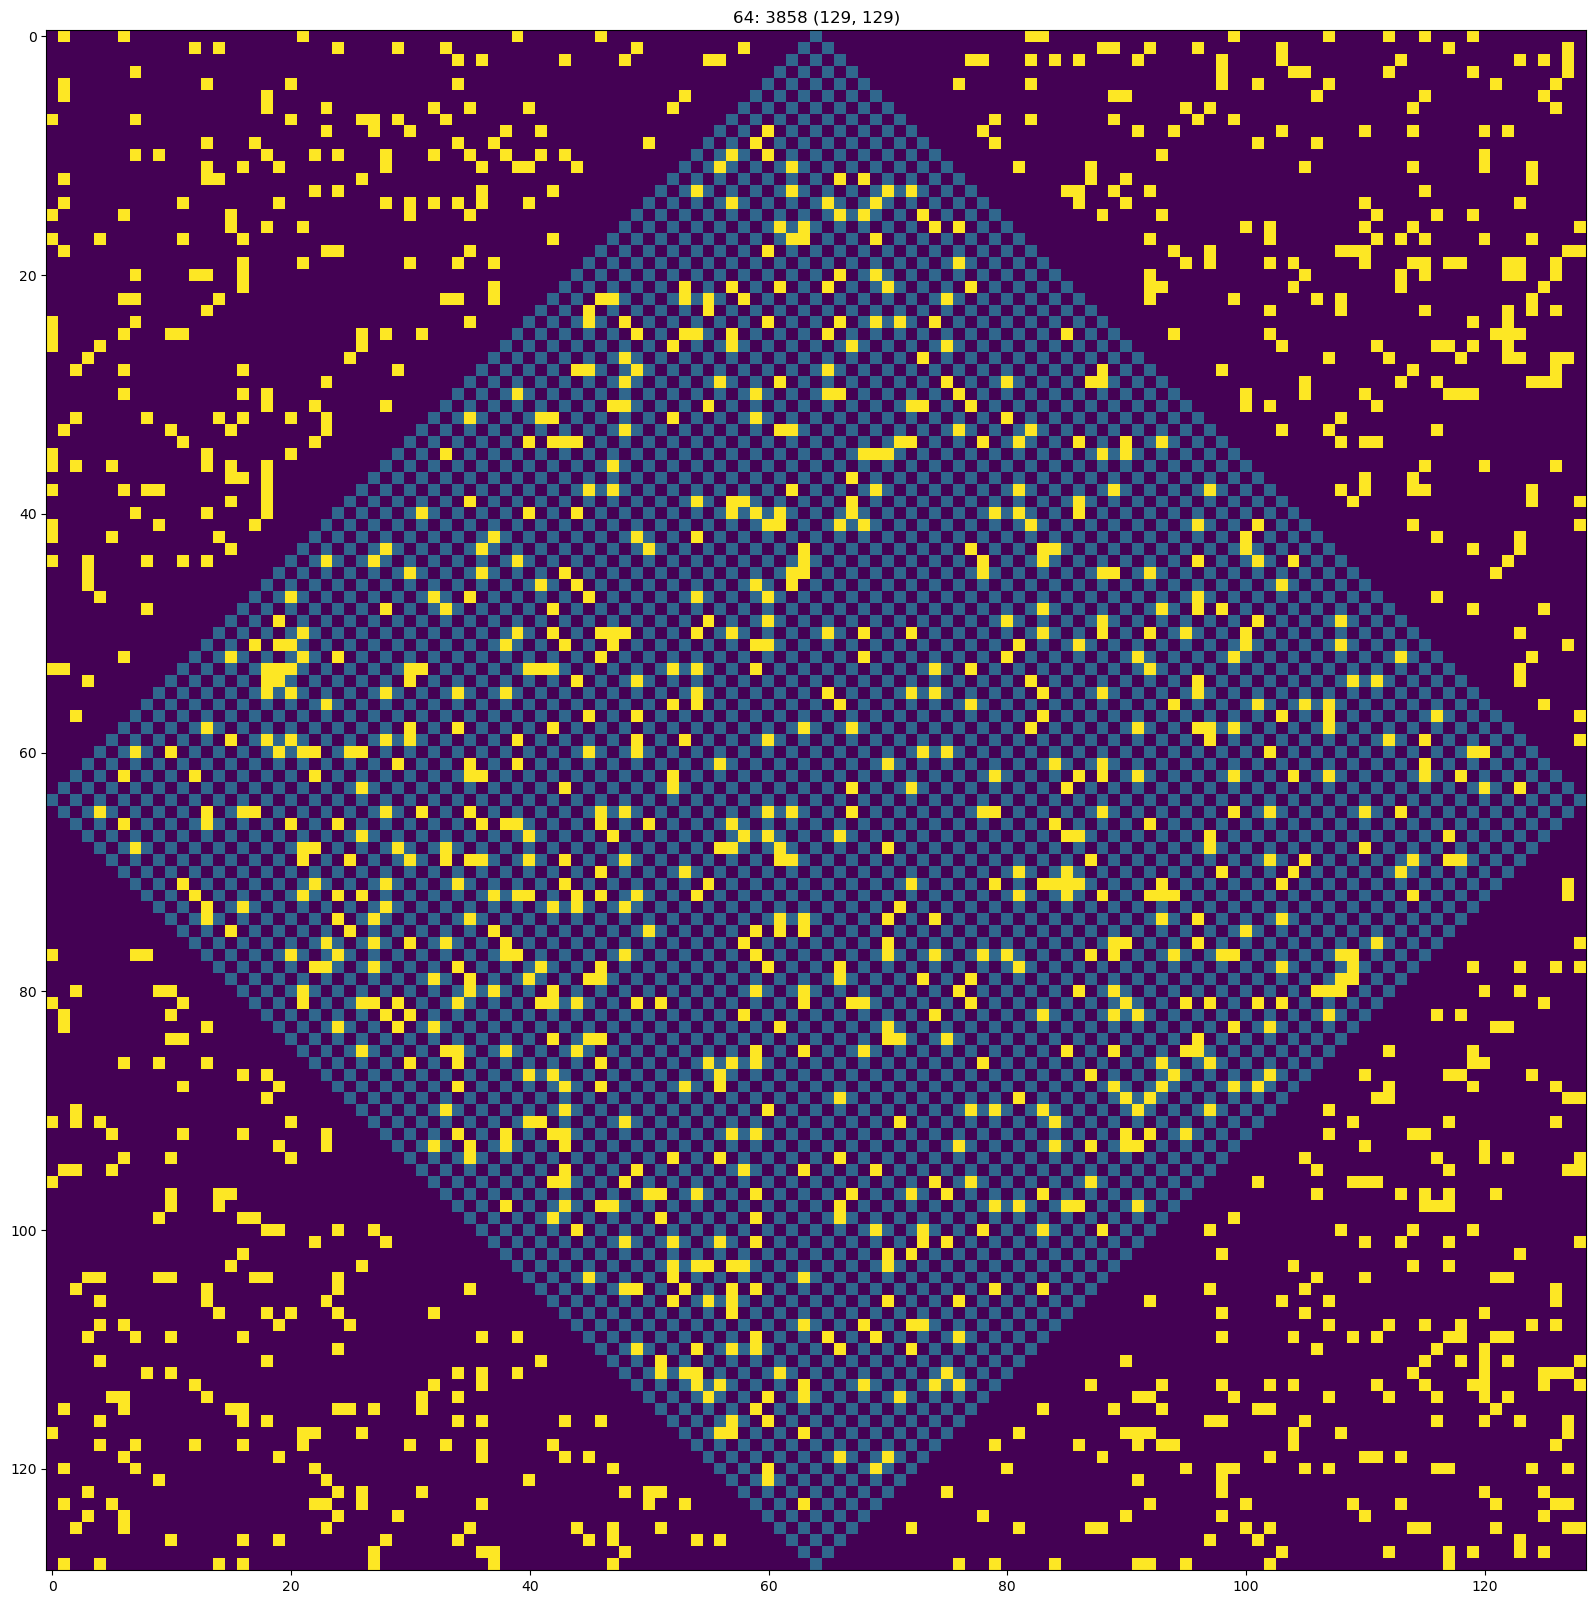

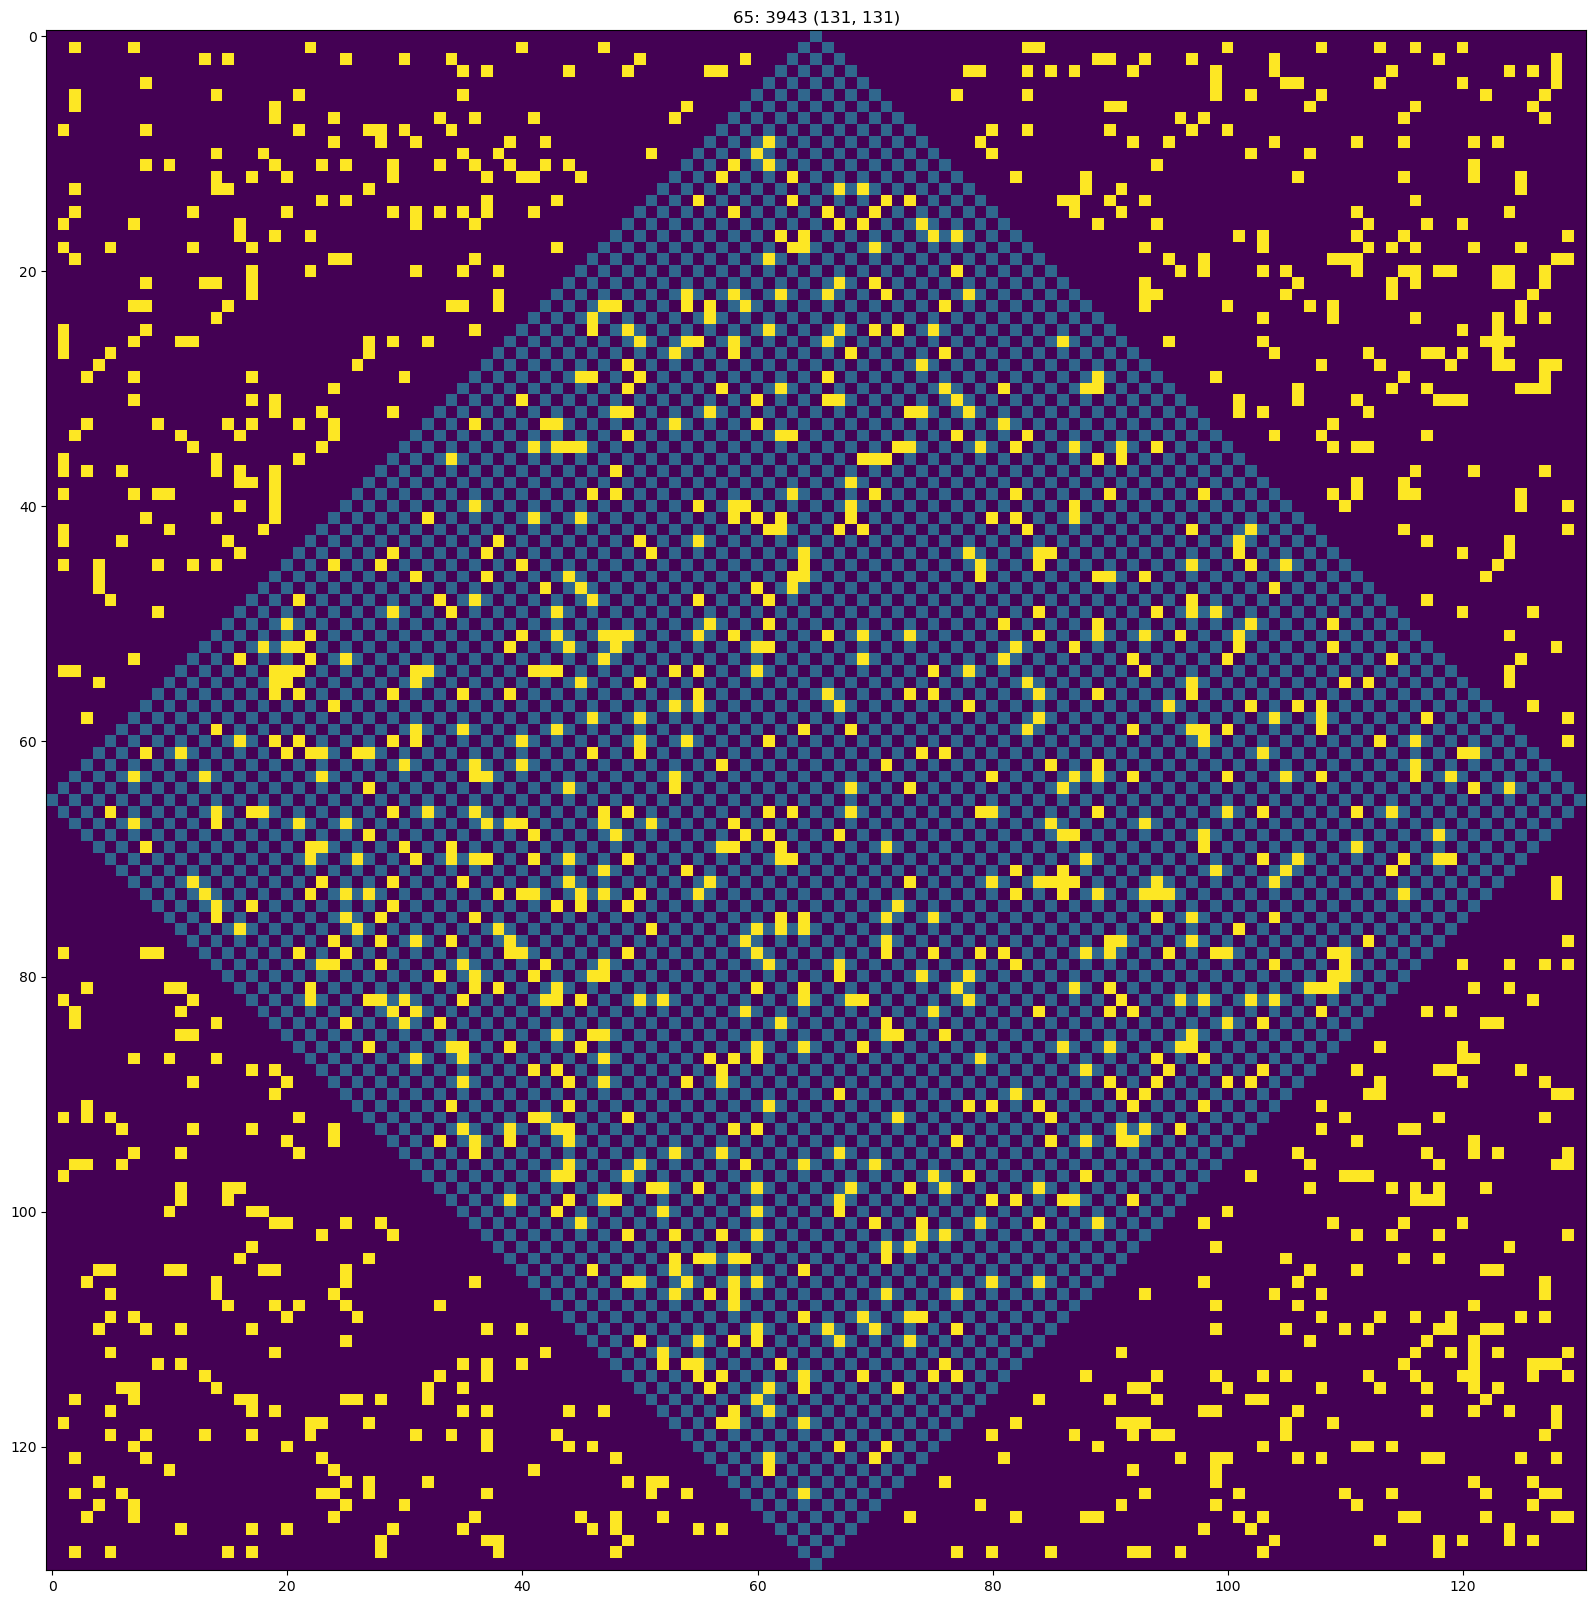

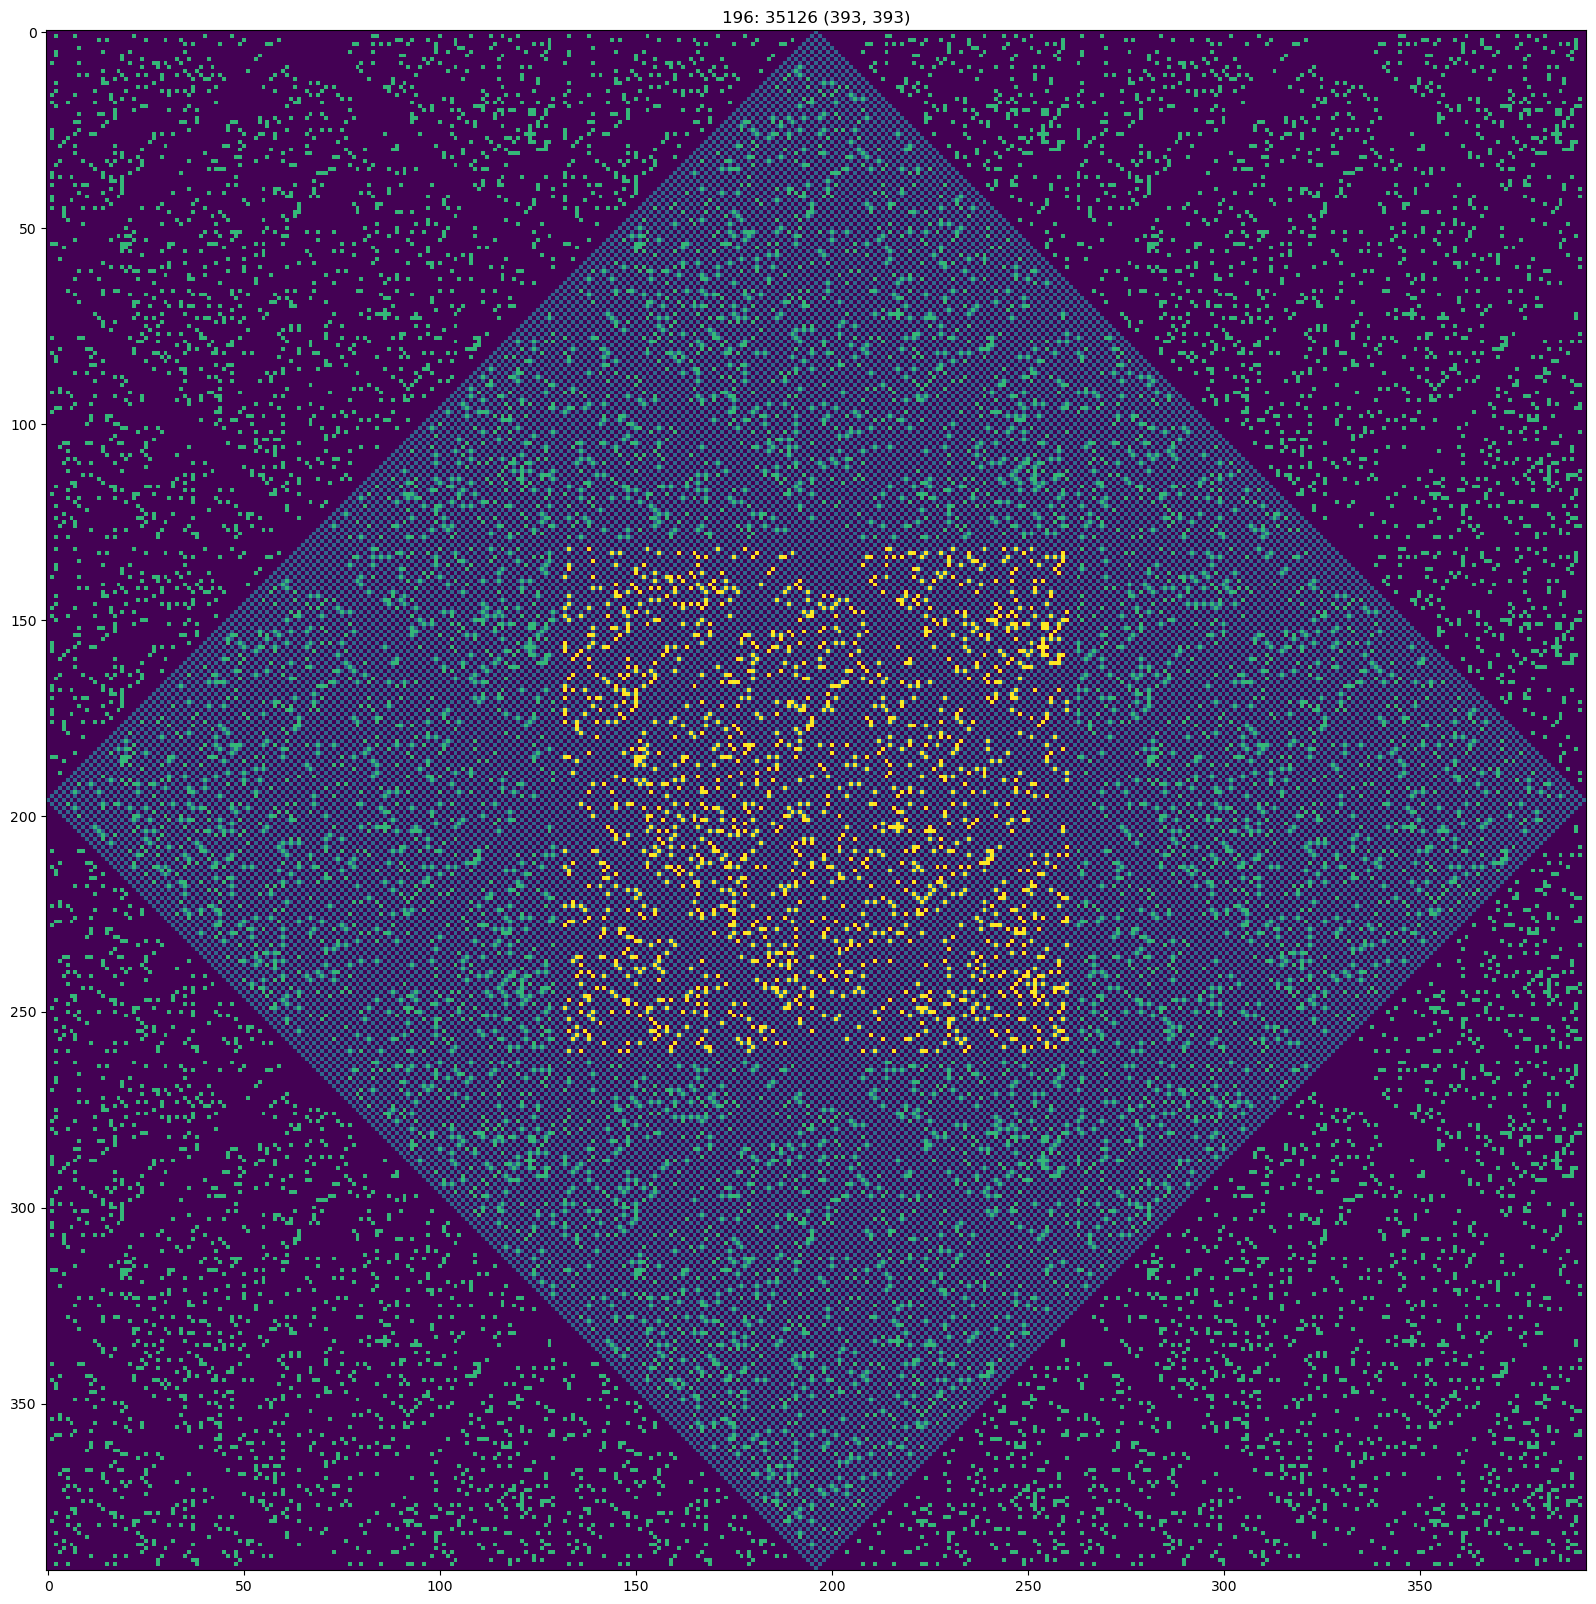

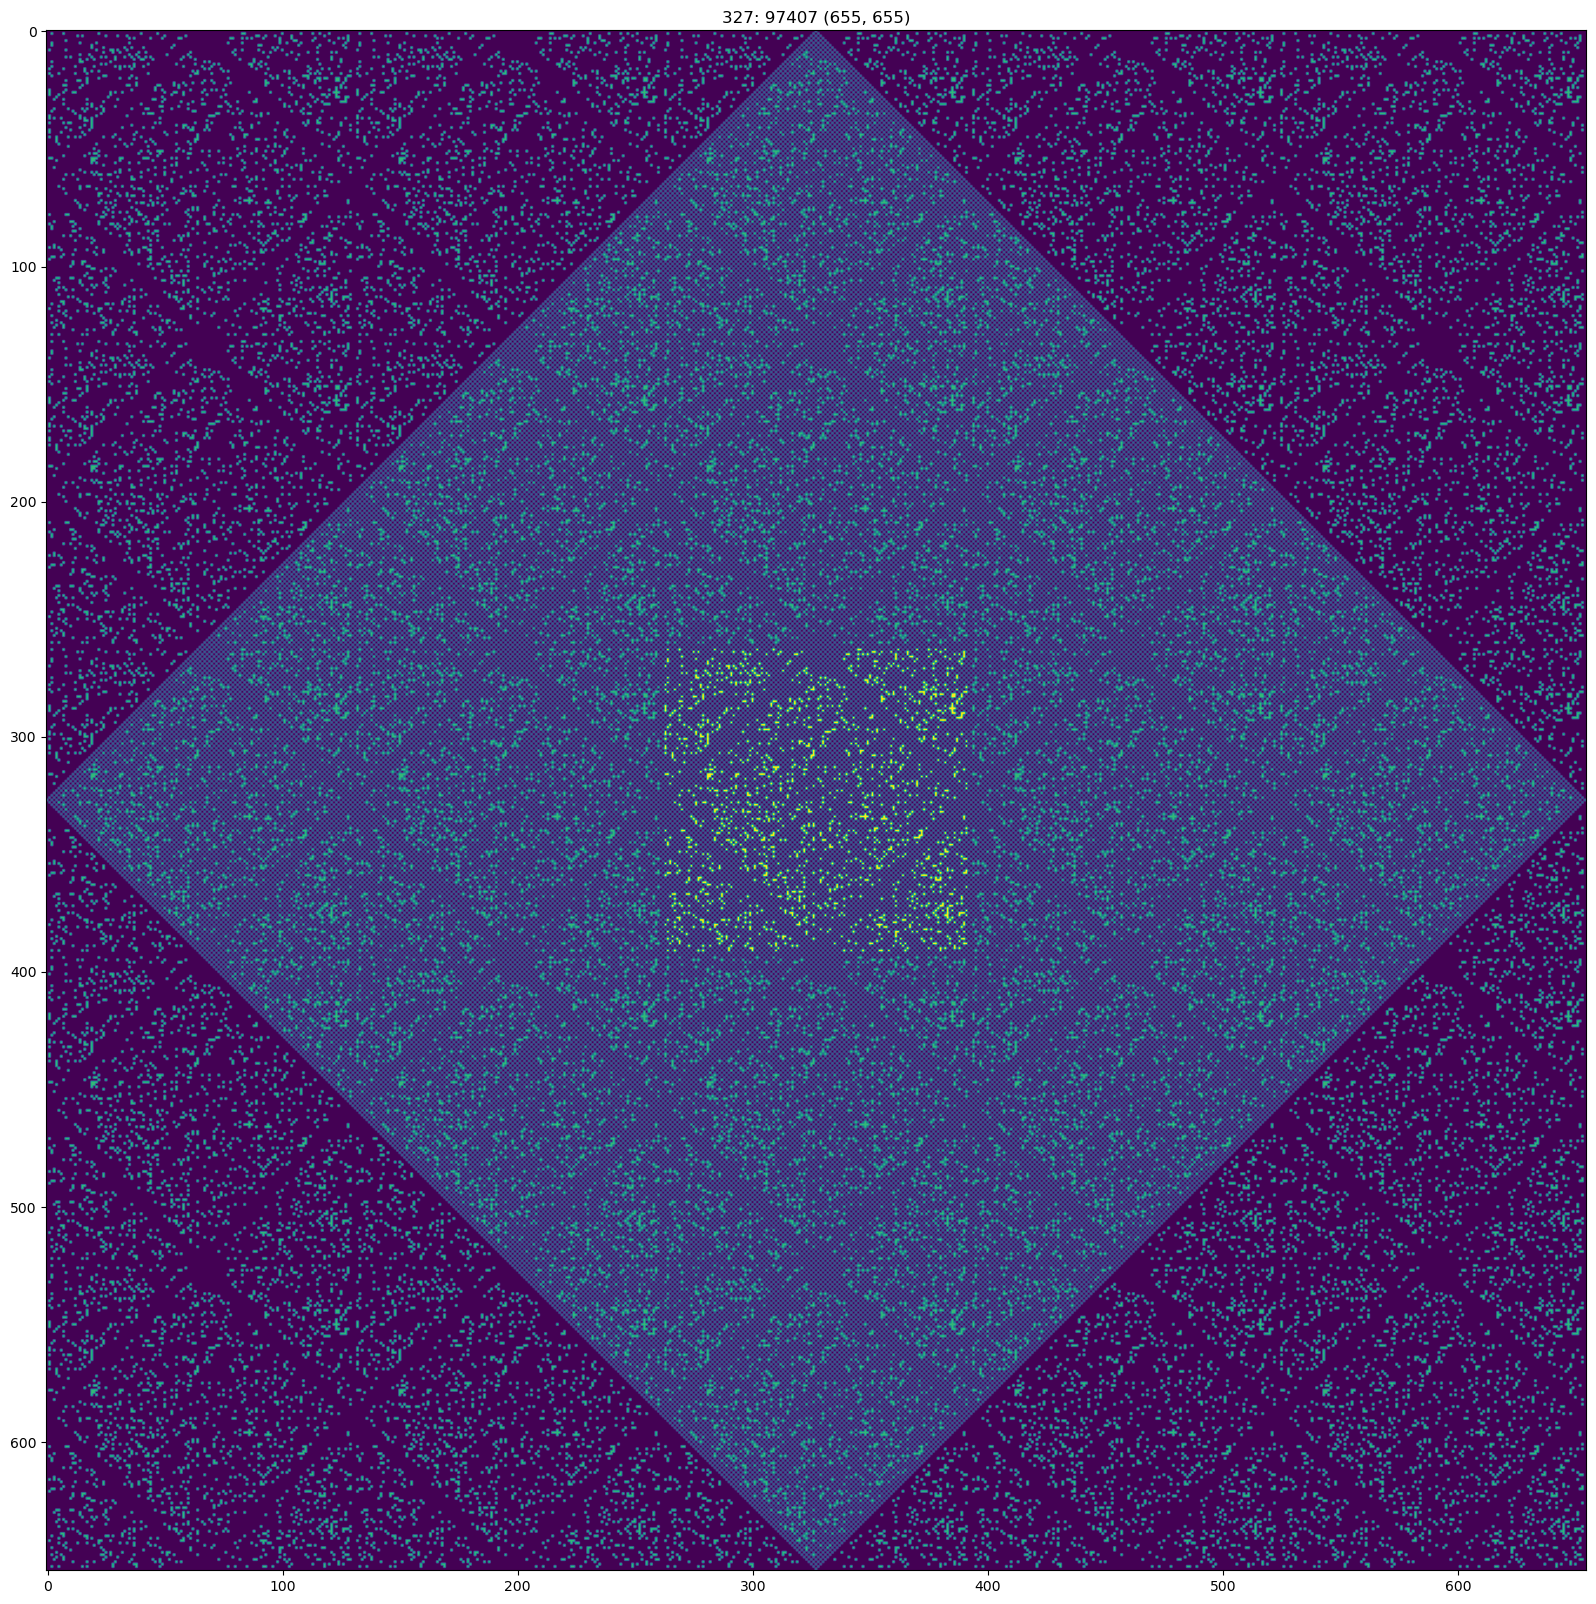

In [600]:
V = solve_b(data, 460)

In [564]:
n  = V.shape[0]//131

In [565]:
# for i in range(n):
#     for j in range(n):
#         valid = V[i*131:(i+1)*131,j*131:(j+1)*131] == 1
# #         print(valid.shape)
#         plt.imshow(valid)
#         plt.title(valid.sum())
#         plt.show()

In [566]:
# plt.imshow(sum([
#     V[:131,131:2*131] == 1,
#     V[131:2*131,:131] == 1,
#     V[2*131:,131:2*131] == 1,
#     V[131:2*131,2*131:] == 1,
#     - 2* (reachable * parity).astype(int)
# ]))

In [581]:
# n = 0
full_p1 - outside_p1

3943

In [582]:
# n = 1
full_p0 + 4 * full_p1 - 2*outside_p1 + outside_p0

35126

In [583]:
# n = 2
full_p1 + 4 * full_p0 + 8 * full_p1 - 3*outside_p1 + 2 * outside_p0

97407

In [596]:
def compute(steps):
    n = (steps - 65) // 131
    assert (steps - 65) % 131 == 0
    
    total = [full_p1, full_p0][n % 2]
    
    for i in range(n):
        total += 4 * (i +1) * [full_p0, full_p1][(n+i) % 2]
        
    total -= (n+1) * outside_p1
    total += n * outside_p0
    return total
        

In [597]:
print(compute(65) , 3943)
print(compute(65+131) , 35126)
print(compute(65+131*2) , 97407)


3943 3943
35126 35126
97407 97407


In [598]:
compute(26501365)

636350496972143

In [549]:
full_p0

7780

In [550]:
971 + 992 + 974 + 985 

3922

In [551]:
outside_p0

3922

In [552]:
5859 + 5846 + 5866 + 5853

23424

In [553]:
4 * full_p1 - 2 * outside_p1

23424

In [554]:
23424 - 22904

520

In [544]:
D = np.array(data)
N, M = X.shape
mask = np.zeros((N,M), dtype=np.uint8)
X, Y = np.meshgrid(np.arange(N), np.arange(M))
ox, oy = np.argwhere(D==2).flatten()
parity = ((X+Y) % 2 == 1)
not_rock = (D != 1)
reachable = abs(X-ox) + abs(Y-oy) <= 65

In [545]:
full_p1 = (parity * not_rock).sum() - 1
full_p0 = (~parity * not_rock).sum()

outside_p1 = (parity * not_rock * ~reachable).sum()
outside_p0 = (~parity * not_rock * ~reachable).sum()

In [556]:
35126 - (full_p1 + 4 * full_p0 + outside_p1 - 2 * outside_p0)

255

In [557]:
97407 - (full_p1 + 4 * full_p0 + 8 * full_p1 + 2 * outside_p1 - 3 * outside_p0)

480

In [558]:
190786 - (full_p1 + 4 * full_p0 + 8 * full_p1 + 12 * full_p0 + 3 * outside_p1 - 4 * outside_p0)

595

In [ ]:
  A
 ABA
ABABA
 ABA
  A

In [434]:
kernel = np.array([[0,1,0],[1,-10,1],[0,1,0]])

In [435]:
from scipy.signal import convolve2d

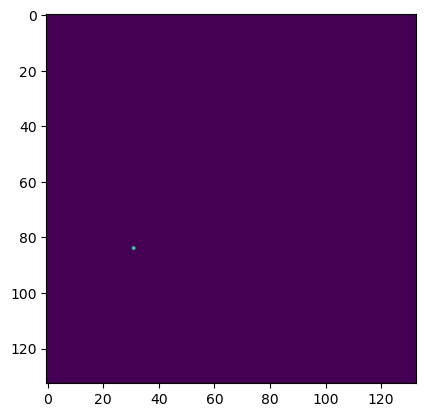

In [436]:
plt.imshow(convolve2d(D, kernel)==4)

In [423]:
(~parity * not_rock * reachable).sum()

3858

In [413]:
(parity * not_rock * reachable).sum()

3944

In [403]:
131*131

17161

In [406]:
full_1 = (parity * not_rock).sum()

In [407]:
full_1

7770

In [404]:
(parity * not_rock).sum()

7770

In [405]:
(~parity * not_rock).sum()

7780

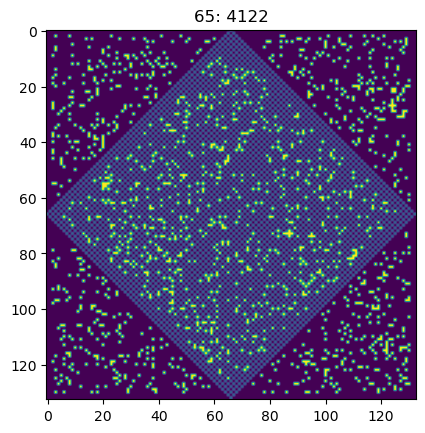

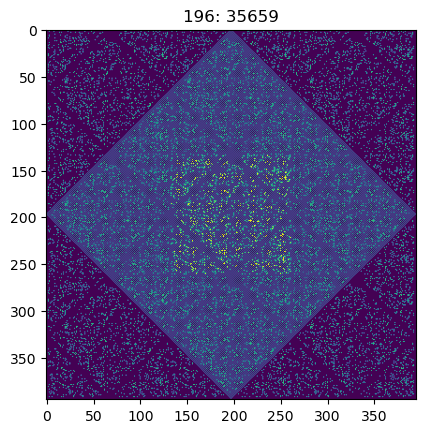

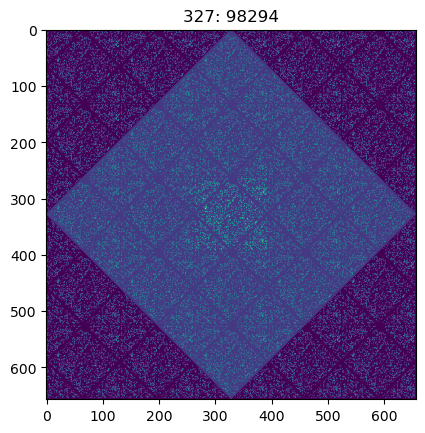

111861

In [402]:
solve_b(data, 350)

In [364]:
26501365 % 131

65

In [365]:
(parity * not_rock).sum()

7770

In [388]:
(~parity * not_rock).sum()

7780

In [391]:
(~parity * not_rock * reachable).sum()

3858

In [392]:
(parity * not_rock * reachable).sum()

3684

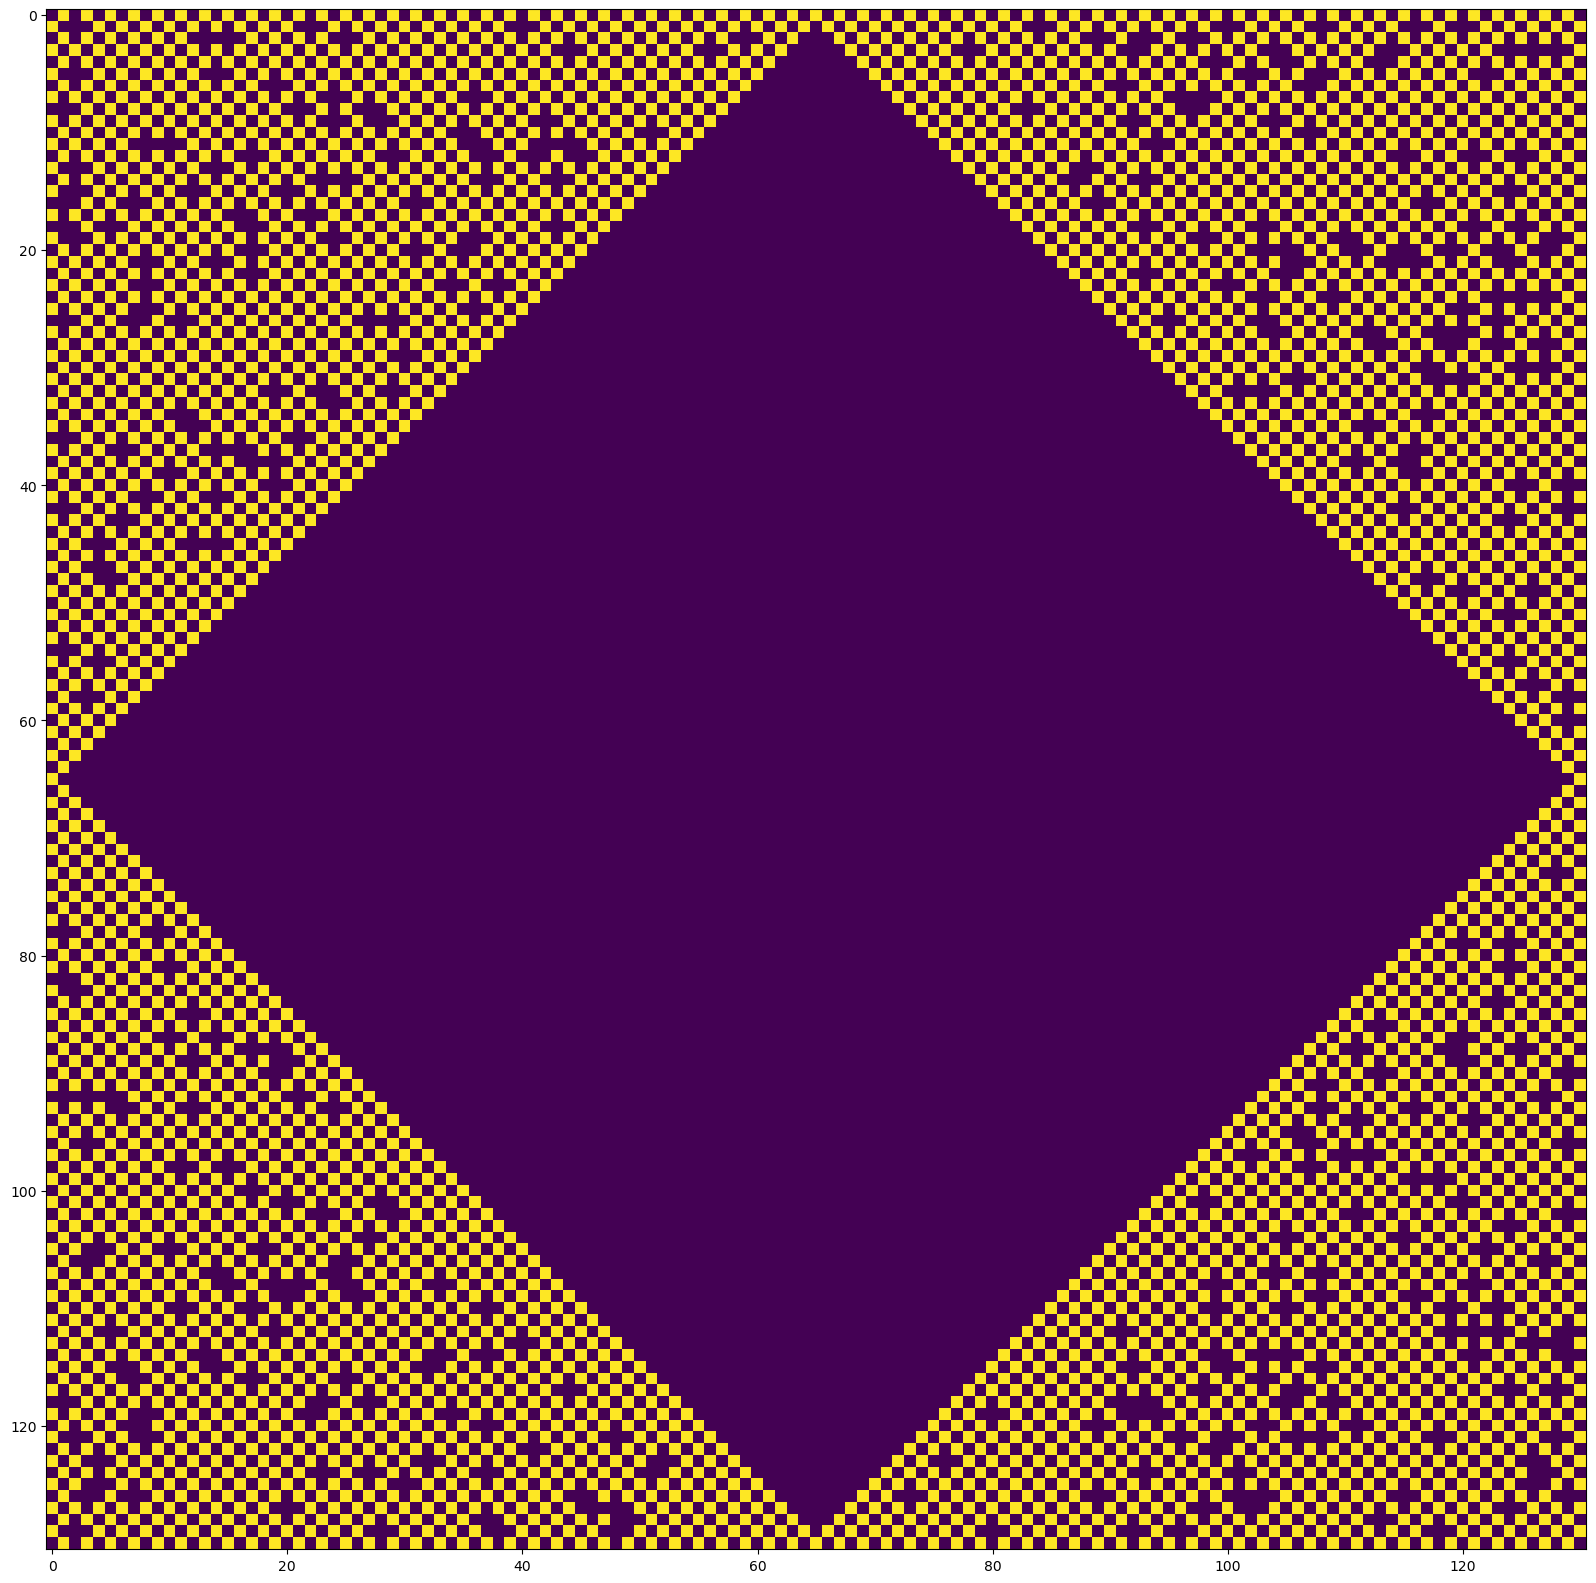

In [363]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
plt.imshow(parity*not_rock*~reachable)

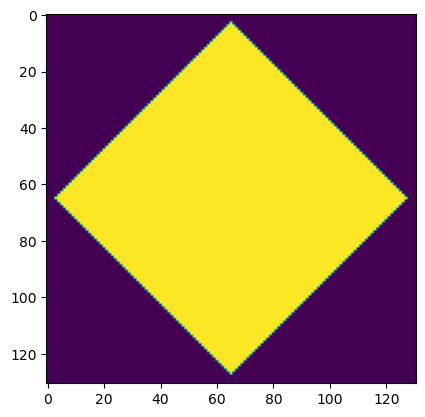

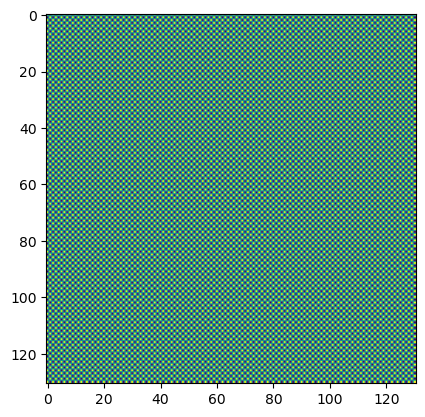

In [328]:
plt.imshow(mask)

131 131


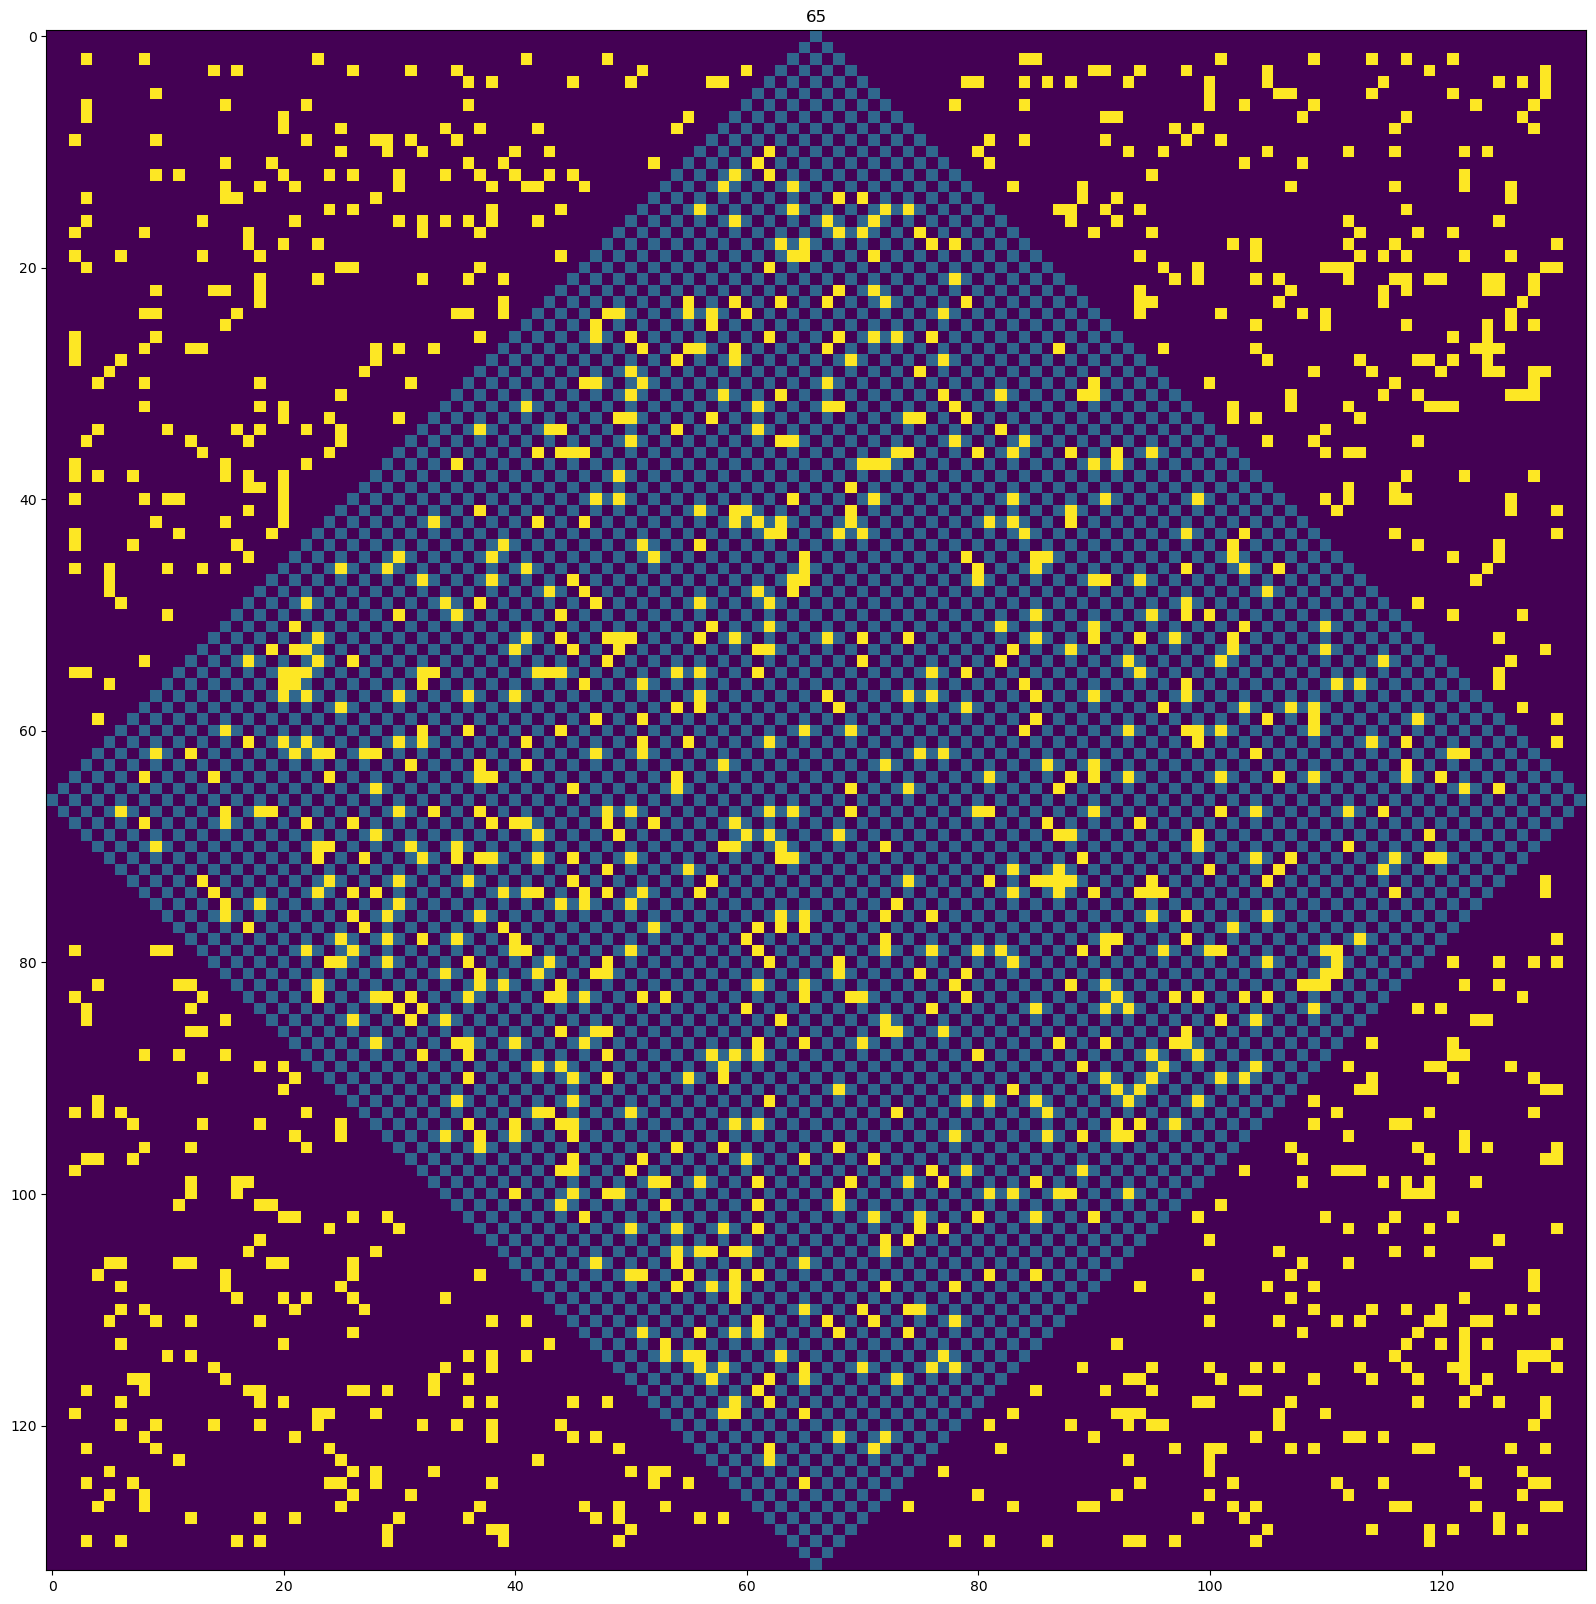

131 131


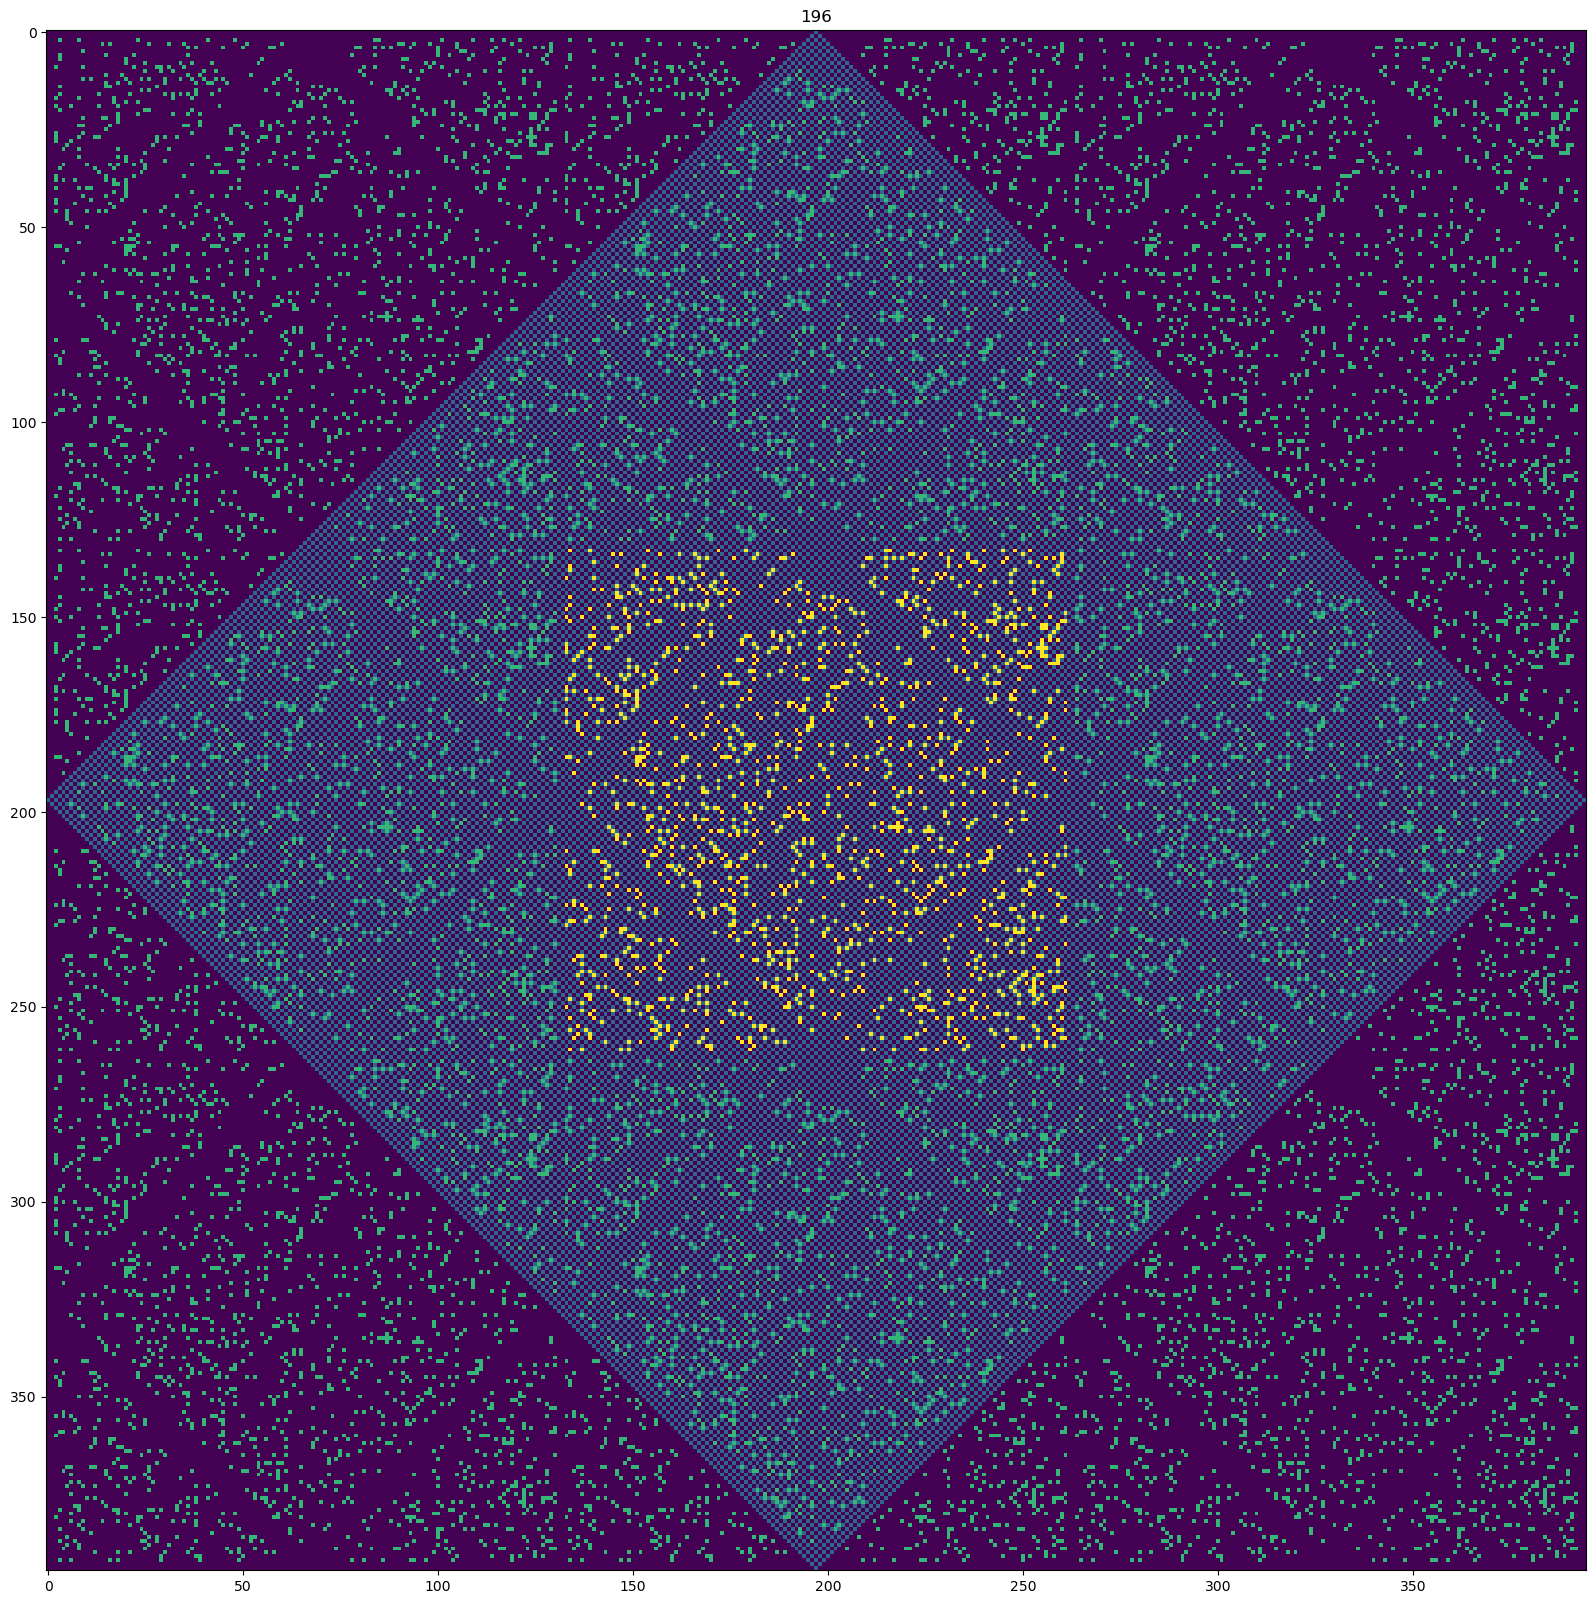

131 131


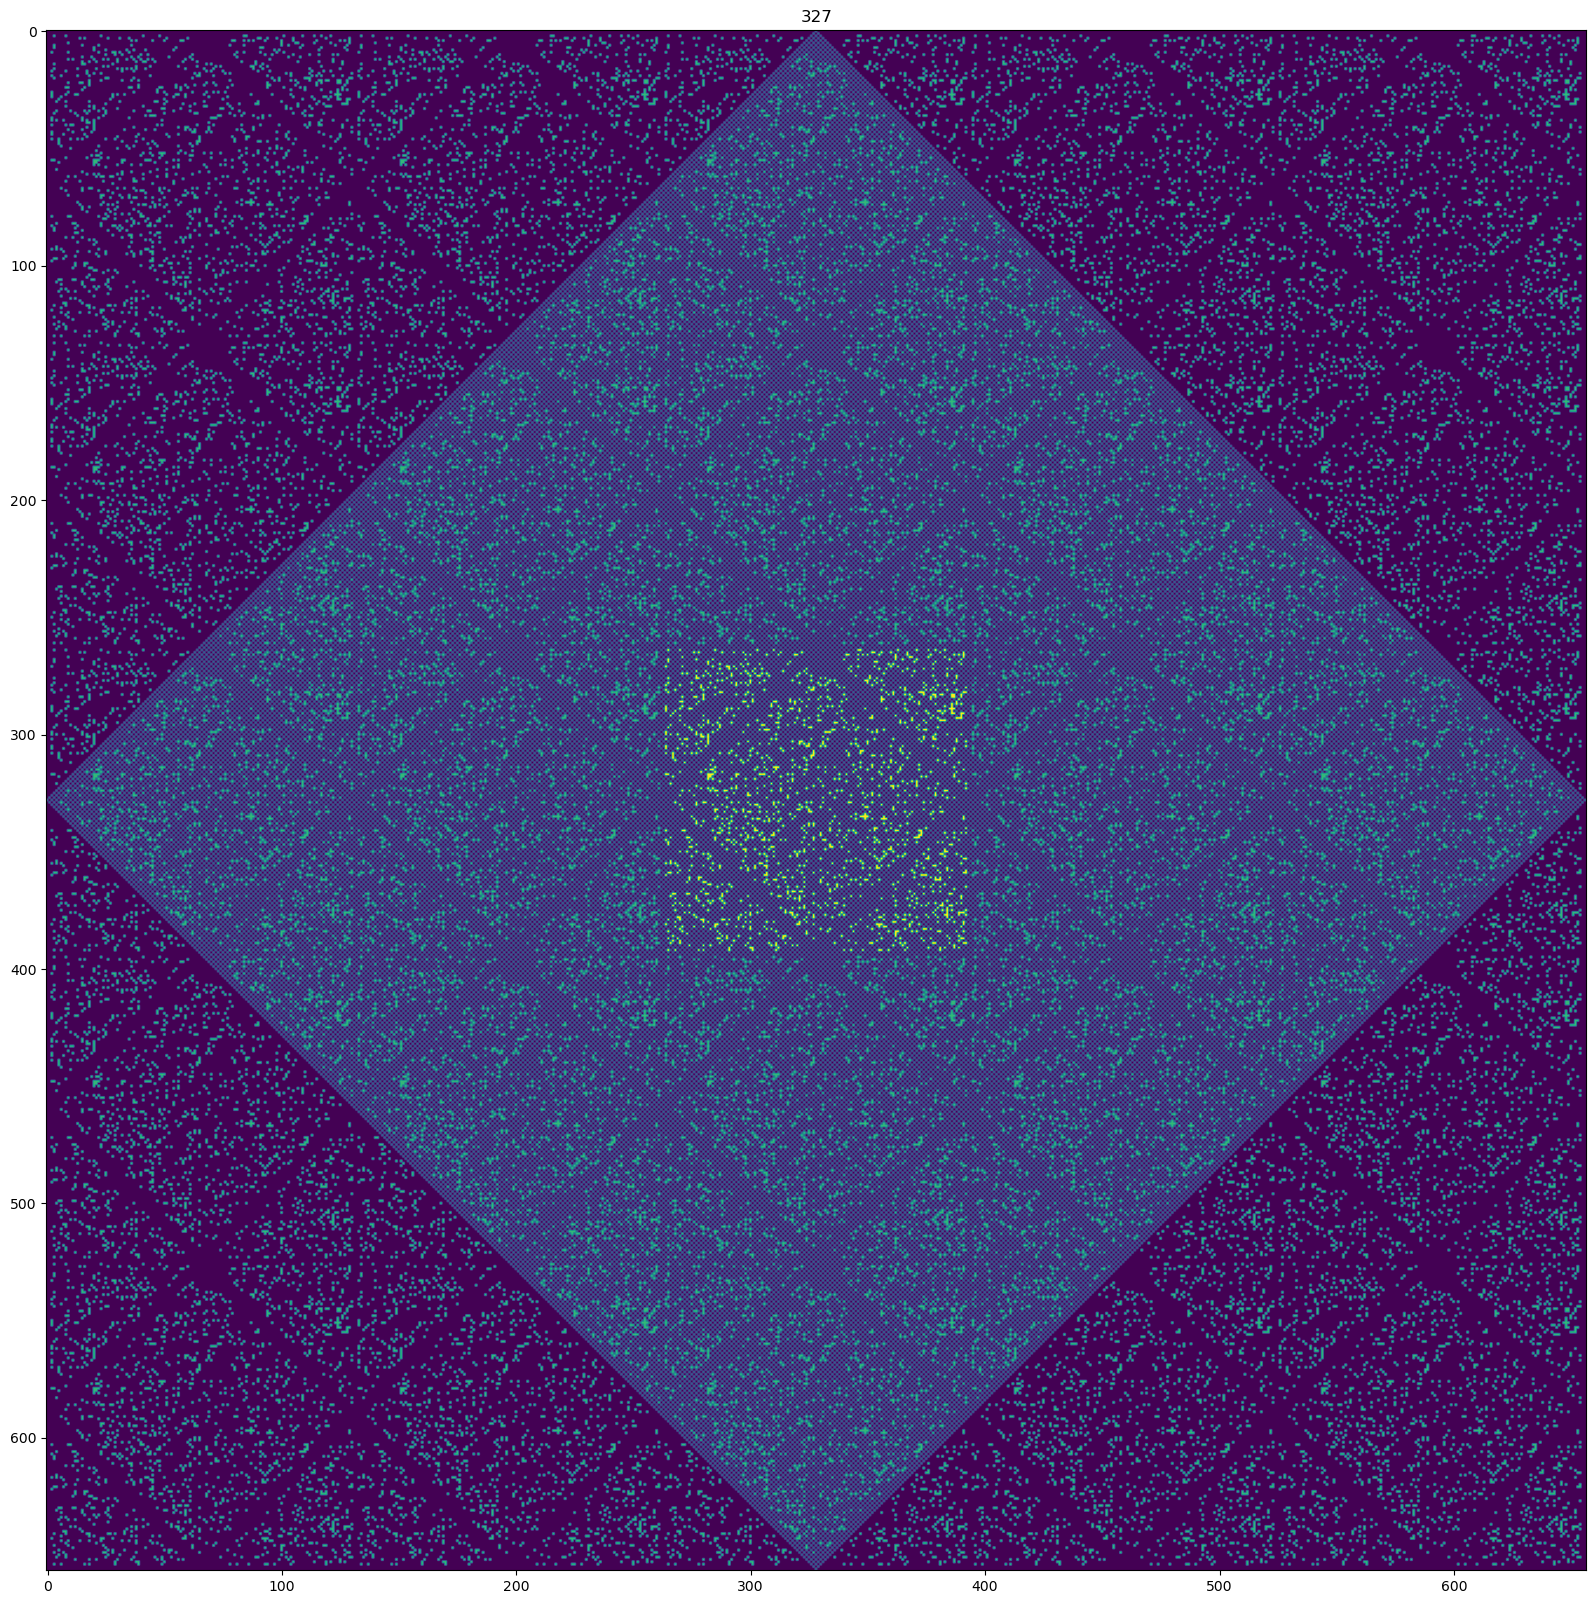

111861

In [315]:
solve_b(data, 350)

In [313]:
(26501365-63) % 131

2

In [302]:
# for steps in [6, 10, 50, 100, 500, 1000, 5000]:
#     print(steps, solve_b(sample, steps))

In [37]:
def as_coords(data):
    ROCK, START = 1, 2
    start = None
    rocks = []
    for i, row in enumerate(data):
        for j, val in enumerate(row):
            if val == START:
                start = (i, j)
            elif val == ROCK:
                rocks.append((i, j))
    return start, set(rocks)

In [77]:
from collections import defaultdict 

def solve_b(data, steps):
    N, M = len(data), len(data[0])
    start, rocks = as_coords(data)
#     print(rocks)
    positions = {start: 1}
    for i in range(steps):
        new_positions = {}
        for (x, y), count in positions.items():
            for (x2, y2) in [(x+1, y), (x-1,y), (x,y+1), (x,y-1)]:
                if x2 < 0 or x2 >= N or y2 < M or y2 >= M:
                    count += 1
                x2, y2 = x2 % N, y2 % M
                if (x2, y2) in rocks:
                    continue
                new_positions[x2, y2] = count
        positions = new_positions
    return len(positions.values()), sum(positions.values())

In [78]:
for steps in [6, 10, 50, 100, 500, 1000, 5000]:
    print(steps, solve_b(sample, steps))

6 (16, 285)
10 (50, 1429)
50 (81, 9698)
100 (81, 18273)
500 (81, 86873)
1000 (81, 172623)
5000 (81, 858623)


In [83]:
import toolz

In [92]:
def viz(rocks, positions, N, M):
    map_ = np.zeros((N,M))
    for x,y in rocks:
        map_[x,y] = -1
    for (x,y), tiles in positions.items():
        map_[x,y] = len(tiles)
    plt.imshow(map_)
    plt.show()

In [107]:
from collections import defaultdict 

def solve_b(data, steps):
    N, M = len(data), len(data[0])
    start, rocks = as_coords(data)
    positions = {start: set([(0,0)])}
    history = []
    for i in range(steps):
#         viz(rocks, positions, N, M)
#         print(positions)
        new_positions = defaultdict(set)
        for (x, y), tiles in positions.items():
            for (x2, y2) in [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]:
                new_tiles = tiles
                if x2 < 0:
                    new_tiles = set([(X-1,Y) for X,Y in tiles])
                elif x2 >= N:
                    new_tiles = set([(X+1,Y) for X,Y in tiles])
                if y2 < 0:
                    new_tiles = set([(X,Y-1) for X,Y in tiles])
                elif y2 >= M:
                    new_tiles = set([(X,Y+1) for X,Y in tiles])
                    
                x2, y2 = x2 % N, y2 % M
                if (x2, y2) in rocks:
                    continue
                new_positions[x2, y2] |= new_tiles
        positions = new_positions
#         print(positions)
#         print()
        n_pos = sum(map(len,positions.values()))
        history.append(n_pos)
#     return sum(map(len,positions.values()))
    return history

In [156]:
H = solve_b(data, 500)

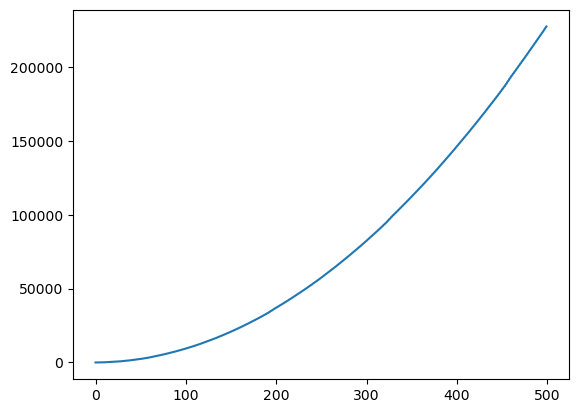

In [187]:
plt.plot(H)

In [188]:
D = np.diff(H)

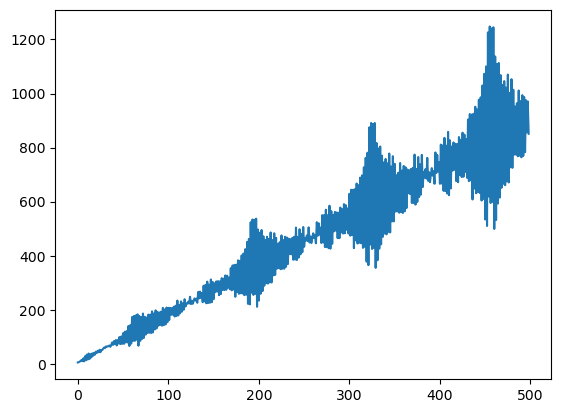

In [189]:
plt.plot(D)

In [190]:
D2 = np.diff(D)

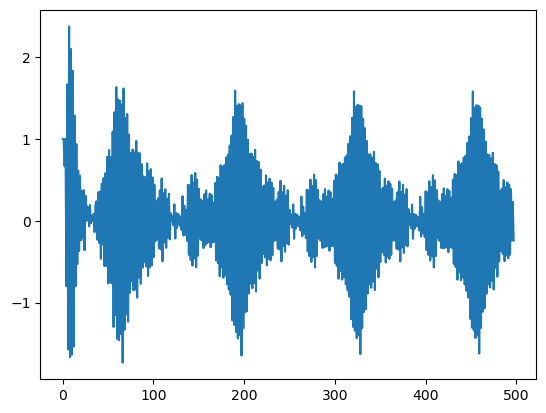

In [191]:
plt.plot(D2/np.arange(1,1+len(D2)))

In [192]:
e2 = D2/np.arange(1,1+len(D2))

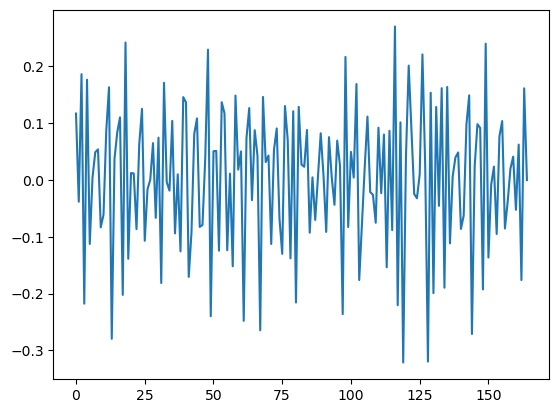

In [193]:
N = len(e2)
o = 133
plt.plot(e2[200:N-o]-e2[200+o:N])

In [ ]:
plt.

In [160]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [163]:
A = autocorr1(D[200:], np.arange(300))

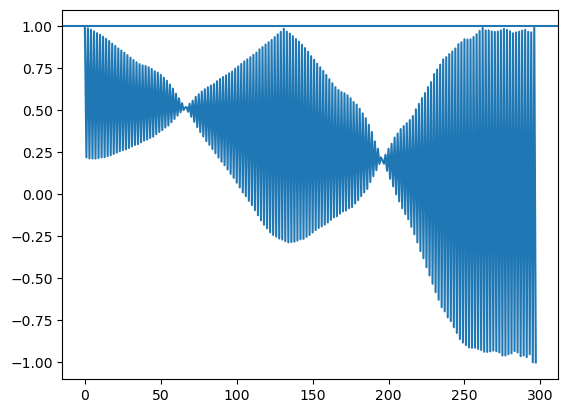

In [164]:
plt.plot(A)
plt.axhline(1.0)

In [105]:
for steps in [6, 10, 50, 100, 500, 1000, 5000]:
    print(steps, solve_b(sample, steps))

6 16
10 50
50 1594
100 6536
500 167004
1000 668697


KeyboardInterrupt: 

In [106]:
for steps in [6, 10, 50, 100, 500, 1000, 5000]:
    print(steps, solve_b(data, steps))

6 47
10 114
50 2340
100 9288


KeyboardInterrupt: 

In [15]:
def solve_a(data):
    pass

In [2]:
def solve_b(data):
    pass